# Gross Domestic Product Analysis
The data is taken from https://www.bea.gov/national/index.htm#gdp - Current-dollar and "real" GDP.
Comparison of 
Motor vehicles and parts,
Gasoline and other energy goods,
Household consumption expenditures (for services),
Fixed investment,
Net exports of goods and services.
Values are in millions of dollars.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [49]:
df = pd.read_excel(r"C:\Users\Administrator\Downloads\Section1All_xls.xlsx", 'T10505-A', skiprows = 7, index_col = 1).transpose()
df.head()

,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Motor vehicles and parts,Furnishings and durable household equipment,Recreational goods and vehicles,Other durable goods,Nondurable goods,Food and beverages purchased for off-premises consumption,...,Gross investment,State and local,Consumption expenditures,Gross investment,nan,nan,nan,nan,nan,nan
Line,1,2,3,4,5,6,7,8,9,10,...,59,60,61,62,NaN,"1. Net expenses of NPISHs, defined as their gr...","2. Gross output is net of unrelated sales, sec...","3. Excludes unrelated sales, secondary sales, ...","4. Excludes software embedded, or bundled, in ...",5. Research and development investment exclude...
Unnamed: 2,A191RC,DPCERC,DGDSRC,DDURRC,DMOTRC,DFDHRC,DREQRC,DODGRC,DNDGRC,DFXARC,...,A798RC,A829RC,A991RC,A799RC,NaN,NaN,NaN,NaN,NaN,NaN
1929,104560,77384,43769,9828,3330,3777,1549,1172,33941,16252,...,177,7748,5076,2672,NaN,NaN,NaN,NaN,NaN,NaN
1930,92167,70136,38165,7661,2233,3004,1362,1062,30504,14830,...,229,8292,5354,2938,NaN,NaN,NaN,NaN,NaN,NaN
1931,77406,60671,31708,5910,1625,2600,887,798,25798,11911,...,296,8140,5458,2681,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
#df = df.drop(columns = ['Line', 'Unnamed: 2'])
#df = df.transpose()
df = df.drop(df.index[[0,1]])
df.index.name = 'Year'
df.head()

,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Motor vehicles and parts,Furnishings and durable household equipment,Recreational goods and vehicles,Other durable goods,Nondurable goods,Food and beverages purchased for off-premises consumption,...,Gross investment,State and local,Consumption expenditures,Gross investment,nan,nan,nan,nan,nan,nan
Year,,,,,,,,,,,,,,,,,,,,,
1929,104560,77384,43769,9828,3330,3777,1549,1172,33941,16252,...,177,7748,5076,2672,NaN,NaN,NaN,NaN,NaN,NaN
1930,92167,70136,38165,7661,2233,3004,1362,1062,30504,14830,...,229,8292,5354,2938,NaN,NaN,NaN,NaN,NaN,NaN
1931,77406,60671,31708,5910,1625,2600,887,798,25798,11911,...,296,8140,5458,2681,NaN,NaN,NaN,NaN,NaN,NaN
1932,59532,48712,24125,3957,975,1853,537,592,20168,9034,...,363,6976,5179,1797,NaN,NaN,NaN,NaN,NaN,NaN
1933,57165,45944,23756,3761,1089,1743,443,486,19995,9488,...,556,6451,5097,1354,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df.columns

Index([                                                                 '    Gross domestic product',
                                                                 'Personal consumption expenditures',
                                                                                           '  Goods',
                                                                                 '    Durable goods',
                                                                    '      Motor vehicles and parts',
                                                 '      Furnishings and durable household equipment',
                                                             '      Recreational goods and vehicles',
                                                                         '      Other durable goods',
                                                                              '    Nondurable goods',
                                   '      Food and beverages purchased for off-pre

In [52]:
df = df[['      Motor vehicles and parts', '      Gasoline and other energy goods',
         '    Household consumption expenditures (for services)', '  Fixed investment', 'Net exports of goods and services']]
df = df.rename(columns = {'      Motor vehicles and parts' : 'Vehicles',
                          '      Gasoline and other energy goods' : 'Energy Goods',
                          '    Household consumption expenditures (for services)' : 'Household (con. & Exp.)',
                          '  Fixed investment' : 'Fixed Investment', 'Net exports of goods and services' : 'Net Exports'})
df = df.astype(float)
df = df/1000
df = df[df.index> '1967']
df.head()

,Vehicles,Energy Goods,Household (con. & Exp.),Fixed Investment,Net Exports
Year,,,,,
1968,35.414,23.217,264.041,147.869,1.351
1969,37.448,24.968,290.366,164.387,1.431
1970,34.538,26.286,318.420,168.049,3.950
1971,43.233,27.647,347.170,188.571,0.622
1972,49.365,29.393,382.802,219.038,-3.372


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


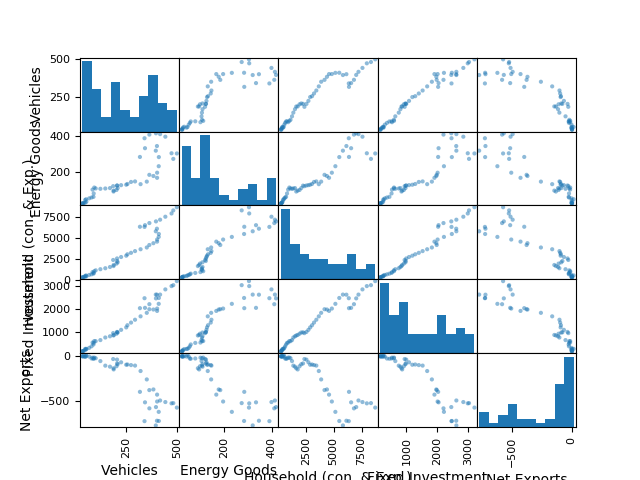

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AC0B748>,
      dtype=object)

In [53]:
pd.tools.plotting.scatter_matrix(df)

<IPython.core.display.Javascript object>


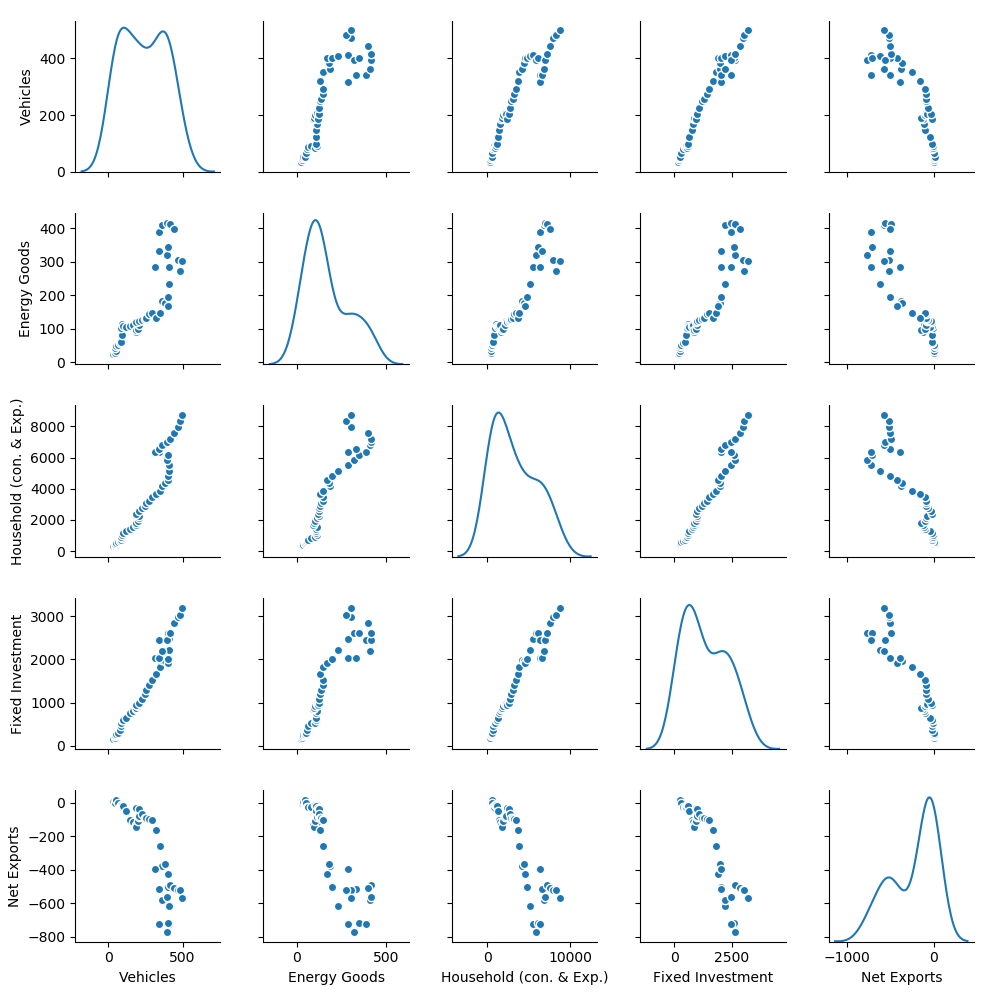

In [45]:
import seaborn as sns
g = sns.pairplot(df, diag_kind='kde', size=2);